In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math 
import io


In [151]:
from google.colab import files
uploaded = files.upload()


Saving dataset1.csv to dataset1 (5).csv


In [183]:
df = pd.read_csv(io.BytesIO(uploaded['dataset1.csv']),header = None)
df = df.drop(0, axis=0).astype(float)#removes the first row of the dataset
# removes all the elements of the dataset whose y == 2
x = np.array(df.drop([df.columns[-1]], axis = 1))
y = np.array(df[df.columns[-1]])

print(x.shape, y.shape)

print(type(x[0][1]))

(2000, 2) (2000,)
<class 'numpy.float64'>


In [184]:
x_train , x_test =x[:1600] ,x[1600:]  
y_train , y_test =y[:1600] ,y[1600:] 
print(x_train.shape, y_train.shape)  
print(x_test.shape, y_test.shape)

(1600, 2) (1600,)
(400, 2) (400,)


In [185]:

x_train_1 = x_train[y_train == 1]
y_train_1 = y_train[y_train == 1]
x_train_2 = x_train[y_train == 2]
y_train_2 = y_train[y_train == 2]
p_1 = x_train_1.shape[0]/x_train.shape[0]
p_2 = 1 - p_1
mu_1 = np.mean(x_train_1,axis = 0)
mu_2 = np.mean(x_train_2, axis = 0)
var_1 = np.var(x_train_1, axis = 0) 
cov_1 = np.cov(x_train_1.T)
var_2 = np.var(x_train_2, axis = 0) 
cov_2 = np.cov(x_train_2.T)
naive_cov_1 = np.array([[var_1[0],0],[0,var_1[1]]])
naive_cov_2 = np.array([[var_2[0],0],[0,var_2[1]]])
print(p_1)
print(p_2)
print(mu_1)
print(mu_2)
print(var_1)
print(cov_1)
print(var_2)
print(cov_2)
print(naive_cov_1)
print(naive_cov_2)

0.501875
0.49812500000000004
[-0.02636927  0.03628592]
[3.01597283 2.99322144]
[1.01559066 2.14473828]
[[ 1.01685699 -0.14233698]
 [-0.14233698  2.14741252]]
[2.13812794 0.94386615]
[[ 2.14081403 -0.04966553]
 [-0.04966553  0.94505192]]
[[1.01559066 0.        ]
 [0.         2.14473828]]
[[2.13812794 0.        ]
 [0.         0.94386615]]


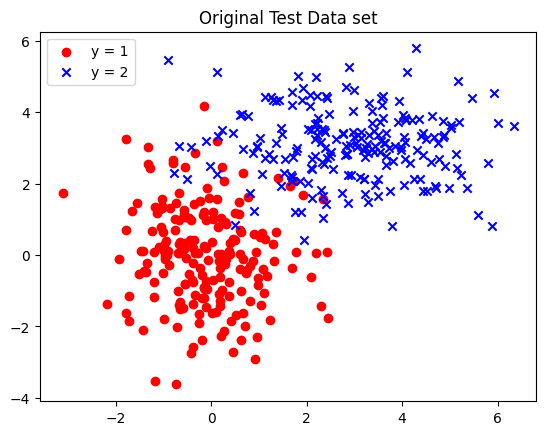

In [186]:
x_test_1 = x_test[y_test == 1]
x_test_2 = x_test[y_test == 2]
plt.title('Original Test Data set')
plt.scatter(x_test_1[:,0],x_test_1[:,1],color ='red', marker ='o',label = 'y = 1')
plt.scatter(x_test_2[:,0],x_test_2[:,1],color = 'blue',marker = 'x', label = 'y = 2')
plt.legend()
plt.show()

In [187]:
def multi_variate_gaussian(X,mu,covar): 
  # flag 0 indicates normal covariance matrix
  # flag other than 0, indicates indicates the diagonal matrix
  
    ans = (1/math.sqrt(np.linalg.det(covar)))* (np.exp(-0.5*((X - mu).T)@ np.linalg.inv(covar) @ (X - mu)) )
    return ans/(2*math.pi)

Bayes Classifier

P(Y=1/X = x)/P(Y = 2/X = x) > 1             
This indicates bayes classifier for Y = 1

    P(Y=1/X=x) = P(X=x/Y = 1)*P(Y = 1)/P(X = x)

    P(Y=2/X=x) = P(X=x/Y = 2)*P(Y = 2)/P(X = x)

    P(X=x/Y = 1)*P(Y = 1) > P(X=x/Y = 2)*P(Y = 2)

In [188]:
''' P(Y=1/X = x)/P(Y = 2/X = x) > 1             -----  bayes classifier for Y = 1
    P(Y=1/X=x) = P(X=x/Y = 1)*P(Y = 1)/P(X = x)
    P(Y=2/X=x) = P(X=x/Y = 2)*P(Y = 2)/P(X = x)
    P(X=x/Y = 1)*P(Y = 1) > P(X=x/Y = 2)*P(Y = 2) '''
# classifying using test data
likelihood_1 = np.array([multi_variate_gaussian(x_test[i],mu_1,cov_1) for i in range(0,x_test.shape[0])])
likelihood_2 = np.array([multi_variate_gaussian(x_test[i],mu_2,cov_2) for i in range(0,x_test.shape[0])])
# since p(y = 1) = p(y = 2)
#likelihood_1 > likelihood_2 -> bayes classifier for y = 1
y_predict = np.greater_equal(likelihood_1,likelihood_2)
# y_predict stores the bool of likelihood_1 > likelihood_2 which classifies 1 from 2
# if y_predict == true, which means the decision rule classifies it as 1 rather than 2
y_testing = []
for i in range(400):
  if y_predict[i]:
    y_testing.append(1)
  else:
    y_testing.append(2)

true_1 = 0  # y_test = 1 and y_testing = 1
true_2 = 0  #y_test = 2 and y_testing = 2
false_1 = 0 #y_test = 2 and y_testing = 1
false_2 = 0
for i in range(400):
  if ((y_test[i] == 1) and (y_testing[i] == 1)):
    true_1 += 1
  elif((y_test[i] == 1) and (y_testing[i] == 2)):
    false_2 += 1
  elif((y_test[i] == 2) and (y_testing[i] == 1)):
    false_1 += 1
  else:
    true_2 += 1
# Confusion matrix constitutes true positives, true negatives , false positives and false negatives
print([[true_1,false_1],[false_2,true_2]])

[[189, 11], [8, 192]]


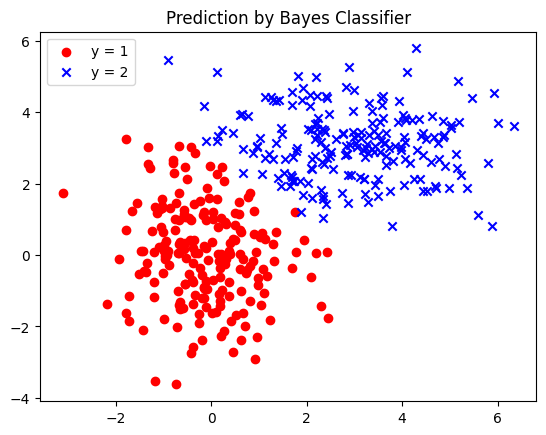

In [189]:
x_1_test = x_test[y_predict == True]
x_2_test = x_test[y_predict == False]
plt.title('Prediction by Bayes Classifier')
plt.scatter(x_1_test[:,0],x_1_test[:,1],color = 'red',marker = 'o', label = 'y = 1')
plt.scatter(x_2_test[:,0],x_2_test[:,1],color = 'blue', marker = 'x', label = 'y = 2')
plt.legend()
plt.show()

(115, 115)
(13225,)
(13225, 2)


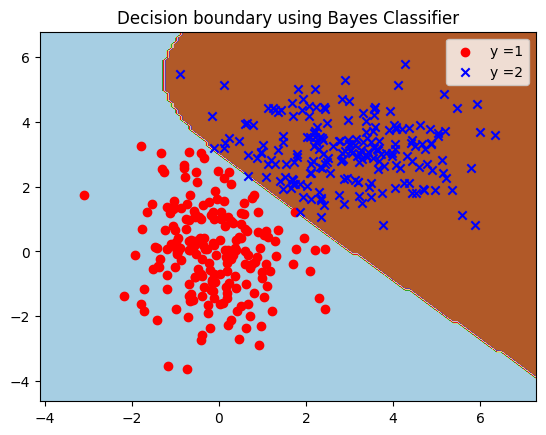

In [190]:
min1 = x_test[:,0].min() - 1
max1 = x_test[:,0].max() + 1
min2 = x_test[:,1].min() - 1
max2 = x_test[:,1].max() + 1
x_1_grid = np.arange(min1,max1,0.1)
x_2_grid = np.arange(min2,max2,0.1)
x,y = np.meshgrid(x_1_grid,x_2_grid)
print(x.shape)
r1,r2 = x.flatten(), y.flatten()
print(r1.shape)
grid = np.column_stack((r1,r2))
print(grid.shape)
likelihood_1_new= np.array([multi_variate_gaussian(grid[i],mu_1,cov_1) for i in range(0,r1.shape[0])])
likelihood_2_new = np.array([multi_variate_gaussian(grid[i],mu_2,cov_2) for i in range(0,r2.shape[0])])
# since p(y = 1) = p(y = 2)
#likelihood_1 > likelihood_2 -> bayes classifier for y = 1
y_predict_new = np.greater_equal(likelihood_1_new,likelihood_2_new)
# y_predict stores the bool of likelihood_1 > likelihood_2 which classifies 1 from 2
# if y_predict_naive == true, which means the decision rule classifies it as 1 rather than 2
y_testing_new = []
for i in range(len(likelihood_1_new)):
  if y_predict_new[i]:
    y_testing_new.append(1)
  else:
    y_testing_new.append(2)


y_testing_new = np.array(y_testing_new)
z = y_testing_new.reshape(x.shape)
plt.title('Decision boundary using Bayes Classifier')
plt.contourf(x,y,z, cmap = 'Paired')
plt.scatter(x_1_test[:,0],x_1_test[:,1],color = 'red', marker ='o', label = 'y =1')
plt.scatter(x_2_test[:,0],x_2_test[:,1],color = 'blue', marker = 'x', label = 'y =2')
plt.legend()
plt.show()

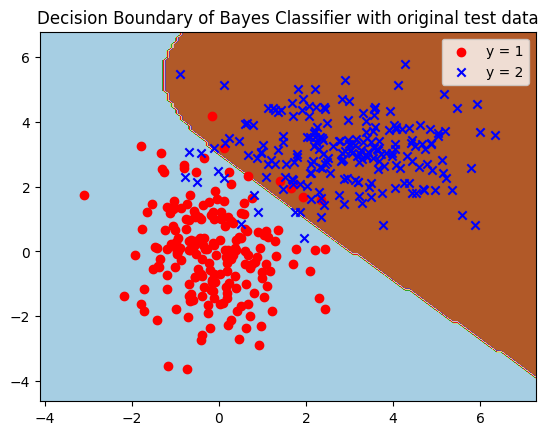

In [191]:

x_1_test = x_test[y_test == 1]
x_2_test = x_test[y_test == 2]
plt.contourf(x,y,z,cmap = 'Paired')
plt.title('Decision Boundary of Bayes Classifier with original test data')
plt.scatter(x_1_test[:,0],x_1_test[:,1],color = 'red',marker = 'o', label = 'y = 1')
plt.scatter(x_2_test[:,0],x_2_test[:,1],color = 'blue', marker = 'x', label = 'y = 2')
plt.legend()
plt.show()

Naive Bayes Classifier

P(Y=1/X = x)/P(Y = 2/X = x) > 1             

Naive bayes classifier for Y = 1

    P(Y=1/X=x) = P(X=x/Y = 1)*P(Y = 1)/P(X = x)

    P(Y=2/X=x) = P(X=x/Y = 2)*P(Y = 2)/P(X = x)

    P(X=x/Y = 1)*P(Y = 1) > P(X=x/Y = 2)*P(Y = 2) 

In Naive Bayes Classifier,
    P(X = x/ Y =y) = P(X = x_1/Y=y)*P(X = x_2/Y = y) 
    
since it is naive,we can obtain the P(X=x/Y = y) directly by multivariate gaussian where covariance matrix is a diagonal matrix

In [192]:
''' P(Y=1/X = x)/P(Y = 2/X = x) > 1             ----- Naive bayes classifier for Y = 1
    P(Y=1/X=x) = P(X=x/Y = 1)*P(Y = 1)/P(X = x)
    P(Y=2/X=x) = P(X=x/Y = 2)*P(Y = 2)/P(X = x)
    P(X=x/Y = 1)*P(Y = 1) > P(X=x/Y = 2)*P(Y = 2) 
    In Naive Bayes Classifier,
      P(X = x/ Y =y) = P(X = x_1/Y=y)*P(X = x_2/Y = y) since it is naive
      we can obtain the P(X=x/Y = y) directly by multivariate gaussian where covariance matrix is a diagonal matrix
    
    '''
# classifying using test data
likelihood_1_naive = np.array([multi_variate_gaussian(x_test[i],mu_1,naive_cov_1) for i in range(0,x_test.shape[0])])
likelihood_2_naive = np.array([multi_variate_gaussian(x_test[i],mu_2,naive_cov_2) for i in range(0,x_test.shape[0])])
# since p(y = 1) = p(y = 2)
#likelihood_1 > likelihood_2 -> bayes classifier for y = 1
y_predict_naive = np.greater_equal(likelihood_1_naive,likelihood_2_naive)
# y_predict stores the bool of likelihood_1 > likelihood_2 which classifies 1 from 2
# if y_predict_naive == true, which means the decision rule classifies it as 1 rather than 2
y_testing_naive = []
for i in range(400):
  if y_predict_naive[i]:
    y_testing_naive.append(1)
  else:
    y_testing_naive.append(2)

true_1_naive = 0  # y_test = 1 and y_testing = 1
true_2_naive = 0  #y_test = 2 and y_testing = 2
false_1_naive = 0 #y_test = 2 and y_testing = 1
false_2_naive  = 0
for i in range(400):
  if ((y_test[i] == 1) and (y_testing_naive[i] == 1)):
    true_1_naive += 1
  elif((y_test[i] == 1) and (y_testing_naive[i] == 2)):
    false_2_naive += 1
  elif((y_test[i] == 2) and (y_testing_naive[i] == 1)):
    false_1_naive += 1
  else:
    true_2_naive += 1

print([[true_1_naive,false_1_naive],[false_2_naive,true_2_naive]])

[[190, 11], [7, 192]]


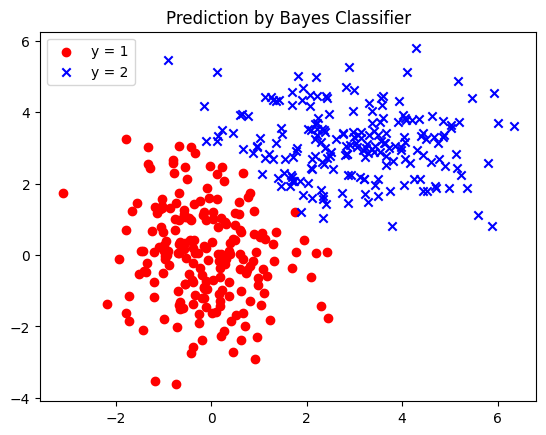

In [193]:
x_1_test = x_test[y_predict_naive == True]
x_2_test = x_test[y_predict_naive == False]
plt.title('Prediction by Bayes Classifier')
plt.scatter(x_1_test[:,0],x_1_test[:,1],color = 'red',marker = 'o', label = 'y = 1')
plt.scatter(x_2_test[:,0],x_2_test[:,1],color = 'blue', marker = 'x', label = 'y = 2')
plt.legend()
plt.show()


(115, 115)
(13225,)
(13225, 2)


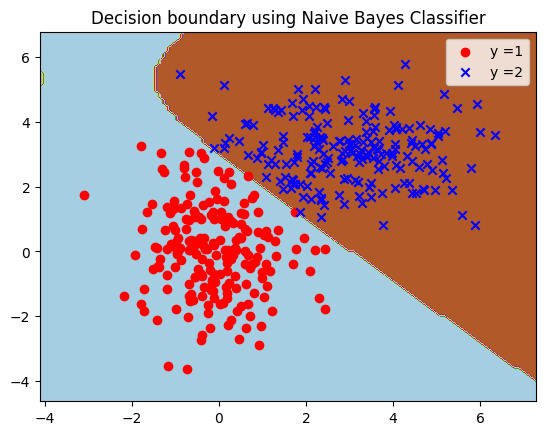

In [194]:
min1 = x_test[:,0].min() - 1
max1 = x_test[:,0].max() + 1
min2 = x_test[:,1].min() - 1
max2 = x_test[:,1].max() + 1
x_1_grid = np.arange(min1,max1,0.1)
x_2_grid = np.arange(min2,max2,0.1)
x,y = np.meshgrid(x_1_grid,x_2_grid)
print(x.shape)
r1,r2 = x.flatten(), y.flatten()
print(r1.shape)
grid = np.column_stack((r1,r2))
print(grid.shape)
likelihood_1_new= np.array([multi_variate_gaussian(grid[i],mu_1,naive_cov_1) for i in range(0,r1.shape[0])])
likelihood_2_new = np.array([multi_variate_gaussian(grid[i],mu_2,naive_cov_2) for i in range(0,r2.shape[0])])
# since p(y = 1) = p(y = 2)
#likelihood_1 > likelihood_2 -> bayes classifier for y = 1
y_predict_new = np.greater_equal(likelihood_1_new,likelihood_2_new)
# y_predict stores the bool of likelihood_1 > likelihood_2 which classifies 1 from 2
# if y_predict_naive == true, which means the decision rule classifies it as 1 rather than 2
y_testing_new = []
for i in range(len(likelihood_1_new)):
  if y_predict_new[i]:
    y_testing_new.append(1)
  else:
    y_testing_new.append(2)


y_testing_new = np.array(y_testing_new)
z = y_testing_new.reshape(x.shape)
plt.title('Decision boundary using Naive Bayes Classifier')
plt.contourf(x,y,z, cmap = 'Paired')
plt.scatter(x_1_test[:,0],x_1_test[:,1],color = 'red', marker ='o', label = 'y =1')
plt.scatter(x_2_test[:,0],x_2_test[:,1],color = 'blue', marker = 'x', label = 'y =2')
plt.legend()
plt.show()

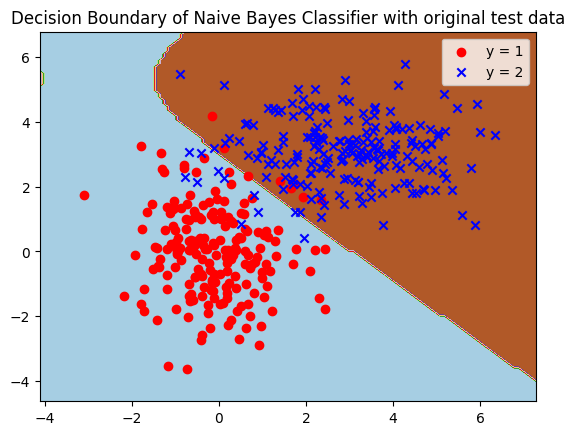

In [195]:
x_1_test = x_test[y_test == 1]
x_2_test = x_test[y_test == 2]
plt.contourf(x,y,z,cmap = 'Paired')
plt.title('Decision Boundary of Naive Bayes Classifier with original test data')
plt.scatter(x_1_test[:,0],x_1_test[:,1],color = 'red',marker = 'o', label = 'y = 1')
plt.scatter(x_2_test[:,0],x_2_test[:,1],color = 'blue', marker = 'x', label = 'y = 2')
plt.legend()
plt.show()